# HighDensityRegionAlgorithm - a 3D example

Demonstrate 3-dimensional high density region algorithm with OpenTURNS.

Given $\alpha \in [0,1]$, the minimum volume level set algorithm searches for $p \in [0, 1]$ with:
$$
P(X \in A(p)) = \alpha,
$$
where
$$
A(p)=\{X \in \mathbb{R}^n \; | \; f(x) > p\}.
$$
In other words, given a level set $\alpha$, we are looking for the probability density value $p$ so that the probability to have a point density greater or equal to $p$ is $\alpha$.

In [1]:
import os
import openturns as ot
from othdrplot import HighDensityRegionAlgorithm
from openturns.viewer import View

The minimum volume level set computation requires a sampling which can be costly with the default value of the parameters, due to a huge sampling size. Hence, we reduce it to 500.

In [2]:
numberOfPointsForSampling=500
ot.ResourceMap.Set('Distribution-MinimumVolumeLevelSetBySampling', 'true')
ot.ResourceMap.Set('Distribution-MinimumVolumeLevelSetSamplingSize', str(numberOfPointsForSampling))

Load the csv data file.

In [3]:
sample = ot.Sample.ImportFromCSVFile('../../data/gauss-mixture-3D.csv')
sample

class=Sample name=../../data/gauss-mixture-3D.csv implementation=class=SampleImplementation name=../../data/gauss-mixture-3D.csv size=500 dimension=3 description=[X0,X1,X2] data=[[0.523496,-0.65085,3.4227],[-3.33781,2.1485,-2.61978],[1.06029,-1.95534,3.70336],...,[-0.942375,2.07842,-2.26177],[-0.339844,2.21172,-1.61104],[1.43532,-0.747831,2.33587]]

In order to run the algorithm, we must estimate the distribution of the data. In this example, we use a density KernelSmoothing estimator.

In [4]:
myks = ot.KernelSmoothing()
distribution = myks.build(sample)

In [5]:
mydp = HighDensityRegionAlgorithm(sample,distribution)

In [6]:
mydp.getOutlierAlpha()

0.9

The 90% default value for the outliers detection is too high: we set it to 0.8.

In [7]:
mydp.setOutlierAlpha(0.8)

In [8]:
mydp.getContoursAlpha()

[0.9, 0.5, 0.1]

In order to get the contours at the same level of probability compared to the outlier detection level, we set it accordingly.

In [9]:
mydp.setContoursAlpha([0.8, 0.5, 0.1])

In [10]:
mydp.run()

The `drawContour` method plots the points and the contours. By default, the ouliers are represented as red points. 

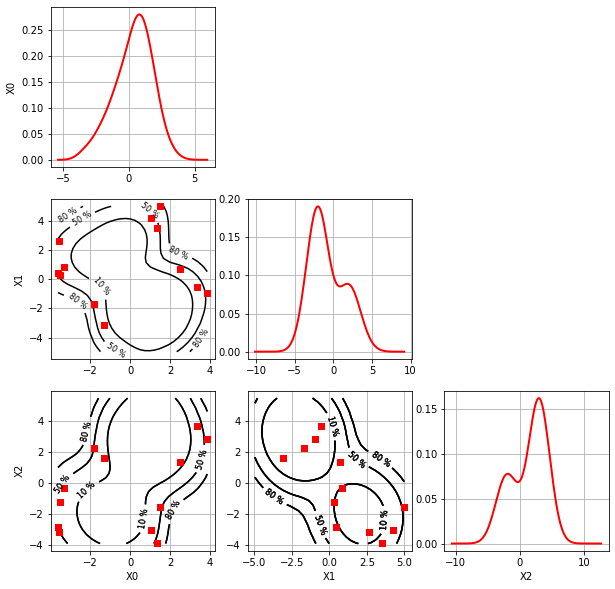

In [11]:
_ = mydp.drawContour()

When we want to plot the inliers instead, we set the `drawOutliers` flag to `False`.

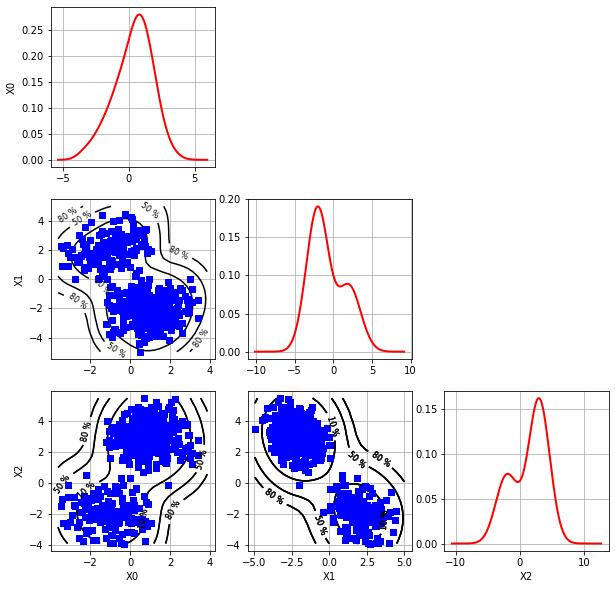

In [12]:
_ = mydp.drawContour(drawOutliers=False)

To see both inliers and outliers, we set the `drawData` flag to `True`. 

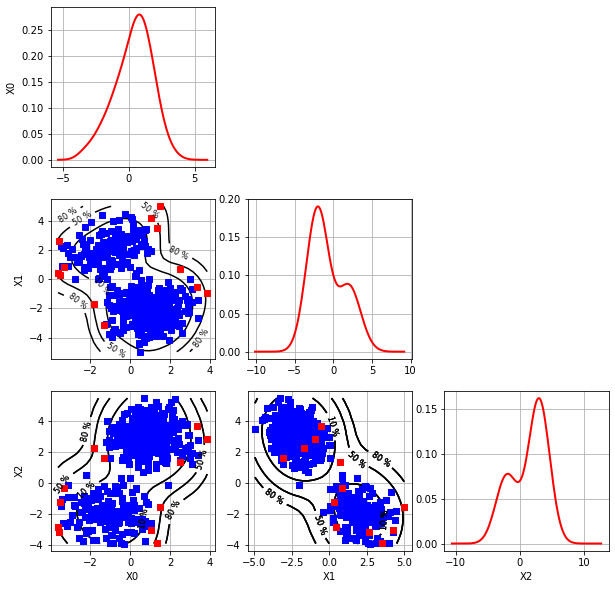

In [13]:
_ = mydp.drawContour(drawData=True)

The `computeOutlierIndices` allows to get the list of the indices of points which are identified as outliers.

In [14]:
print("Outliers at alpha=%.4f" % (mydp.outlierAlpha))
outlierIndices = mydp.computeOutlierIndices()
outlierIndices

Outliers at alpha=0.8000


[75, 79, 145, 148, 189, 246, 299, 314, 340, 351, 386, 471]